In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF 
import numpy as np

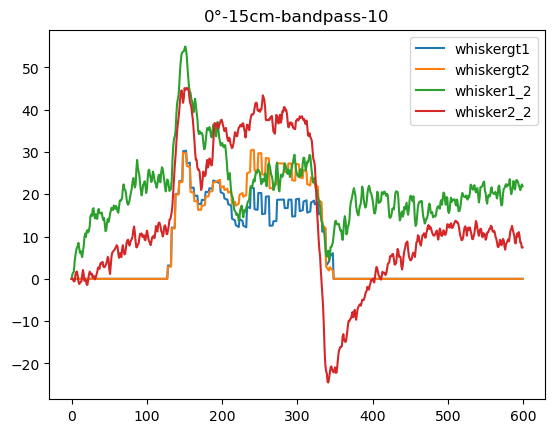

In [2]:
data = pd.read_csv('data1.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
plt.plot(whiskergt1,label='whiskergt1')
plt.plot(whiskergt2,label='whiskergt2')
plt.plot(whisker1_2,label="whisker1_2")
plt.plot(whisker2_2,label="whisker2_2")
plt.legend()
plt.title("0°-15cm-bandpass-10")
plt.show()

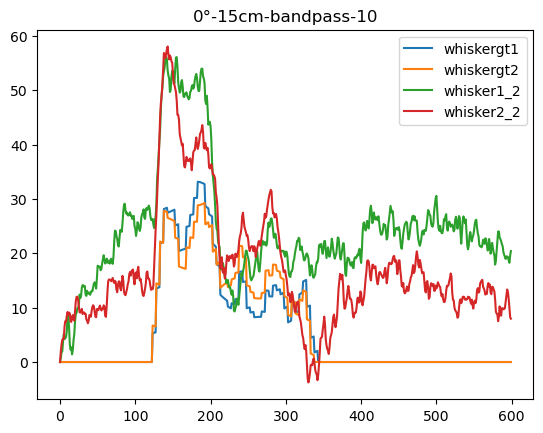

In [6]:
data = pd.read_csv('data2.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
plt.plot(whiskergt1,label='whiskergt1')
plt.plot(whiskergt2,label='whiskergt2')
plt.plot(whisker1_2,label="whisker1_2")
plt.plot(whisker2_2,label="whisker2_2")
plt.legend()
plt.title("0°-15cm-bandpass-10")
plt.show()

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 读取第一个数据集
data1 = pd.read_csv('data1.csv')
whisker1_2_data1 = data1.iloc[:, 1].values
whisker2_2_data1 = data1.iloc[:, 4].values
whiskergt1_data1 = data1.iloc[:, 6].values
whiskergt2_data1 = data1.iloc[:, 7].values

# 读取第二个数据集
data2 = pd.read_csv('data2.csv')
whisker1_2_data2 = data2.iloc[:, 1].values
whisker2_2_data2 = data2.iloc[:, 4].values
whiskergt1_data2 = data2.iloc[:, 6].values
whiskergt2_data2 = data2.iloc[:, 7].values

# 合并数据集
whisker1_2 = np.concatenate((whisker1_2_data1, whisker1_2_data2))
whisker2_2 = np.concatenate((whisker2_2_data1, whisker2_2_data2))
whiskergt1 = np.concatenate((whiskergt1_data1, whiskergt1_data2))
whiskergt2 = np.concatenate((whiskergt2_data1, whiskergt2_data2))

# 划分训练集和测试集
train_whisker1, test_whisker1, train_whisker2, test_whisker2, train_whiskergt1, test_whiskergt1, train_whiskergt2, test_whiskergt2 = train_test_split(whisker1_2, whisker2_2, whiskergt1, whiskergt2, test_size=0.25, shuffle=True)

train_whisker1 = train_whisker1.reshape(-1, 1)
train_whisker2 = train_whisker2.reshape(-1, 1)
test_whisker1 = test_whisker1.reshape(-1, 1)
test_whisker2 = test_whisker2.reshape(-1, 1)

/home/chaoxiangye/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


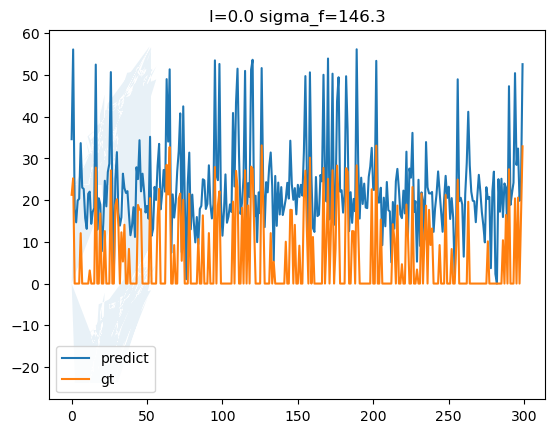

In [31]:
# fit GPR
kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(1e-4, 1e4)) * RBF(length_scale=0.5, length_scale_bounds=(1e-4, 1e4))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2)
gpr.fit(train_whisker1, train_whiskergt1)
mu, cov = gpr.predict(test_whisker1, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))

# plotting
plt.figure()
plt.title("l=%.1f sigma_f=%.1f" % (gpr.kernel_.k2.length_scale, gpr.kernel_.k1.constant_value))
# plt.fill_between(test_whisker1.ravel(), test_whiskergt1 + uncertainty, test_whiskergt1 - uncertainty, alpha=0.1)
plt.plot(test_whisker1, label="predict")
plt.plot(test_whiskergt1, label="gt")
# plt.scatter(train_whisker1, train_whiskergt1, label="train", c="red", marker="x")
plt.legend()

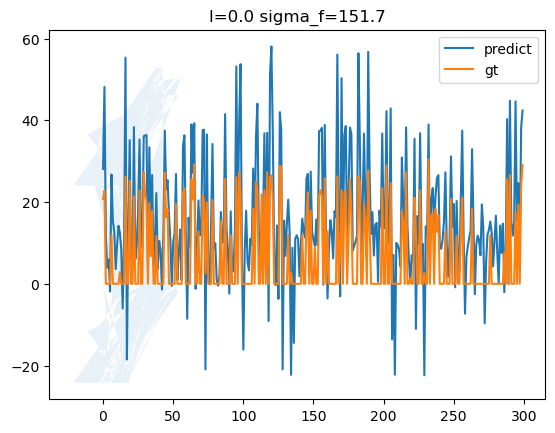

In [32]:
# fit GPR
kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(1e-4, 1e4)) * RBF(length_scale=0.5, length_scale_bounds=(1e-4, 1e4))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2)
gpr.fit(train_whisker2, train_whiskergt2)
mu, cov = gpr.predict(test_whisker2, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))

# plotting
plt.figure()
plt.title("l=%.1f sigma_f=%.1f" % (gpr.kernel_.k2.length_scale, gpr.kernel_.k1.constant_value))
# plt.fill_between(test_whisker2.ravel(), test_whiskergt2 + uncertainty, test_whiskergt2 - uncertainty, alpha=0.1)
plt.plot(test_whisker2,label="predict")
plt.plot(test_whiskergt2,label="gt")
plt.legend()